In [2]:
import pandas as panda
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
import string
import nltk
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn
from textstat.textstat import *
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
import numpy as np
from numpy import ndarray
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as VS
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/akhilaa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Loading the data

In [3]:
# Loading the data
dataset = panda.read_csv('HateSpeechData.csv')
dataset.tail(50)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
24733,25246,3,1,2,0,1,yall crazy hoes need jesus lol
24734,25247,3,0,3,0,1,yall pussies i swur
24735,25248,3,0,0,3,2,yay I like when jacob has colored layouts
24736,25249,3,0,0,3,2,yaya ho.. cute avi tho RT @ViVaLa_Ari I had no...
24737,25250,3,0,1,2,2,yea so about @N_tel 's new friend.. all my fri...
24738,25251,3,0,3,0,1,"yeah I'm a bitch, but guess what? you're still..."
24739,25252,3,0,3,0,1,yeah I'm small den a hoe http://t.co/VV3qdTo7MG
24740,25253,3,1,2,0,1,yeah i got soul i was brought up by colored wo...
24741,25254,3,0,3,0,1,yeah these valley faggots can go fuck themselves
24742,25255,3,1,2,0,1,yes good shapely eurotrash manbooty


<AxesSubplot:>

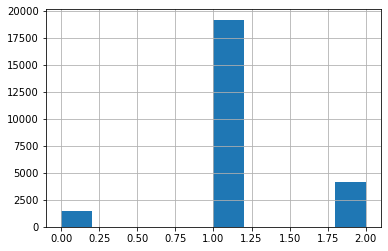

In [3]:
dataset['class'].hist()

In [4]:
# The histogram shows that the majority of the tweets are offensive, followed by neutral and hatred.

In [5]:
tweet=dataset['tweet']
print(tweet)

0        !!! RT @mayasolovely: As a woman you shouldn't...
1        !!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2        !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3        !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4        !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
                               ...                        
24778    you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779    you've gone and broke the wrong heart baby, an...
24780    young buck wanna eat!!.. dat nigguh like I ain...
24781                youu got wild bitches tellin you lies
24782    ~~Ruffled | Ntac Eileen Dahlia - Beautiful col...
Name: tweet, Length: 24783, dtype: object


# Preprocessing the data

In [6]:
#Collecting the stopwords to remove them
stopWords = stopwords.words('english')
print(stopWords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [16]:
## 1. Removal of punctuation and capitalization
## 2. Tokenizing
## 3. Removal of stopwords
## 4. Stemming

#extending the stopwords to include other words used in twitter such as retweet(rt) etc.
other_exclusions = ['#ff', 'ff','rt']
stopWords.extend(other_exclusions)
stemmer = PorterStemmer()

def preprocess(tweet):  
    
    # removal of extra spaces
    regex_pat = re.compile(r'\s+')
    tweet_space = tweet.str.replace(regex_pat, ' ')

    # removal of @name[mention]
    regex_pat = re.compile(r'@[\w\-]+')
    tweet_name = tweet_space.str.replace(regex_pat, '')

    # removal of links[https://abc.com]
    giant_url_regex =  re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
            '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    tweets = tweet_name.str.replace(giant_url_regex, '')
    
    # removal of punctuations and numbers
    punc_remove = tweets.str.replace("[^a-zA-Z]", " ")
    # removal of capitalization
    tweet_lower = punc_remove.str.lower()
    
    # tokenizing
    tokenized_tweet = tweet_lower.apply(lambda x: x.split())
    
    # removal of stopwords
    tokenized_tweet=  tokenized_tweet.apply(lambda x: [item for item in x if item not in stopWords])
    
    # stemming of the tweets
    tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) 
    
    for i in range(len(tokenized_tweet)):
        tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
        tweets_p= tokenized_tweet
    
    return tweets_p

# All the proccessed tweets are stored into another variable
processed_tweets = preprocess(tweet)   

dataset['processed_tweets'] = processed_tweets
dataset['processed_tweets']

0        woman complain clean hous amp man alway take t...
1        boy dat cold tyga dwn bad cuffin dat hoe st place
2               dawg ever fuck bitch start cri confus shit
3                                         look like tranni
4           shit hear might true might faker bitch told ya
                               ...                        
24778    muthaf lie right tl trash mine bibl scriptur hymn
24779      gone broke wrong heart babi drove redneck crazi
24780    young buck wanna eat dat nigguh like aint fuck...
24781                       youu got wild bitch tellin lie
24782    ruffl ntac eileen dahlia beauti color combin p...
Name: processed_tweets, Length: 24783, dtype: object

# Visualizations

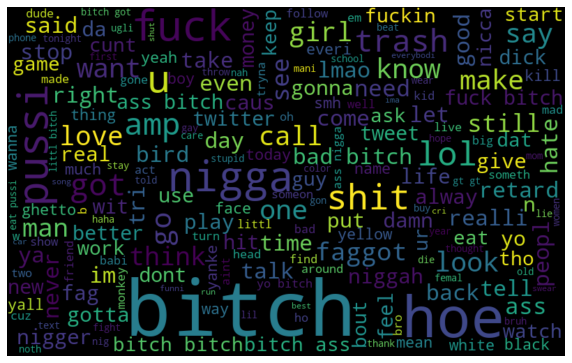

In [8]:
# visualizing which of the word is most commonly used in the twitter dataset

import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ' '.join([text for text in dataset['processed_tweets']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

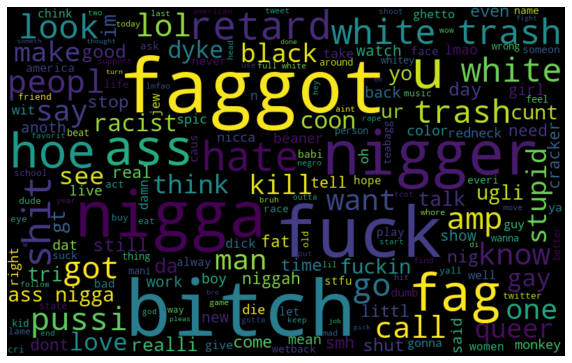

In [9]:
# visualizing which of the word is most commonly used for hate speech
hatred_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 0]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(hatred_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

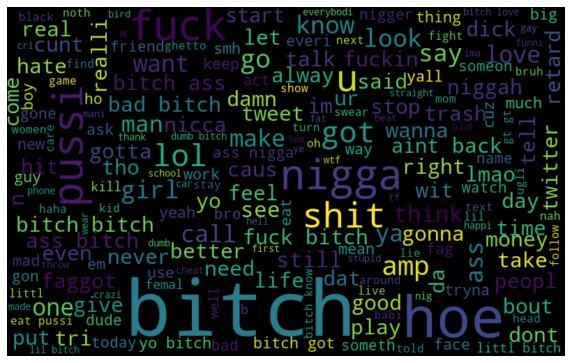

In [10]:
# visualizing which of the word is most commonly used for offensive speech
offensive_words = ' '.join([text for text in dataset['processed_tweets'][dataset['class'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(offensive_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Feature Generation

In [11]:
# Extracting unigram, bigram and trigram features
ngram_vectorizer = CountVectorizer(ngram_range=(1,3),max_df=0.75, min_df=1, max_features=20000)

# bigram feature matrix
ngram = ngram_vectorizer.fit_transform(processed_tweets).toarray()
features=(ngram_vectorizer.get_feature_names())
# print(features)

In [12]:
#TF-IDF Features
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3),max_df=0.75, min_df=5, max_features=20000)

# TF-IDF feature matrix
tfidf = tfidf_vectorizer.fit_transform(dataset['processed_tweets'] ).toarray()

# Building models using Logistic Regression

In [13]:
# Using the ngram features extracted

x = panda.DataFrame(ngram)
y = dataset['class'].astype(int)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.25)


model = LogisticRegression(class_weight='balanced',penalty="l2",solver="liblinear", C=0.01).fit(x_train,y_train)
y_preds = model.predict(x_test)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.43      0.44      0.44       361
           1       0.97      0.89      0.93      4794
           2       0.71      0.96      0.82      1041

    accuracy                           0.88      6196
   macro avg       0.70      0.76      0.73      6196
weighted avg       0.89      0.88      0.88      6196

Accuracy Score: 0.8765332472562943


In [14]:
# Using the TF-IDF features extracted

X = tfidf
y = dataset['class'].astype(int)
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)


model = LogisticRegression(solver='lbfgs',max_iter=1000).fit(X_train_tfidf,y_train)
y_preds = model.predict(X_test_tfidf)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.54      0.17      0.26       361
           1       0.92      0.96      0.94      4794
           2       0.85      0.85      0.85      1041

    accuracy                           0.90      6196
   macro avg       0.77      0.66      0.68      6196
weighted avg       0.88      0.90      0.88      6196

Accuracy Score: 0.8973531310522918


In [23]:
## Sentiment Analysis
sentiment_analyzer = VS()

def count_tags(tweet_c):  
    space_pattern = '\s+'
    giant_url_regex = ('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|'
        '[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    mention_regex = '@[\w\-]+'
    hashtag_regex = '#[\w\-]+'
    parsed_text = re.sub(space_pattern, ' ', tweet_c)
    parsed_text = re.sub(giant_url_regex, 'URLHERE', parsed_text)
    parsed_text = re.sub(mention_regex, 'MENTIONHERE', parsed_text)
    parsed_text = re.sub(hashtag_regex, 'HASHTAGHERE', parsed_text)
    return(parsed_text.count('URLHERE'),parsed_text.count('MENTIONHERE'),parsed_text.count('HASHTAGHERE'))

def sentiment_analysis(tweet):   
    sentiment = sentiment_analyzer.polarity_scores(tweet)    
    twitter_objs = count_tags(tweet)
    features = [sentiment['neg'], sentiment['pos'], sentiment['neu'], sentiment['compound'],twitter_objs[0], twitter_objs[1],
                twitter_objs[2]]
    #features = pandas.DataFrame(features)
    return features

def sentiment_analysis_array(tweets):
    features=[]
    for t in tweets:
        features.append(sentiment_analysis(t))
    return np.array(features)

final_features = sentiment_analysis_array(tweet)
#final_features

new_features = panda.DataFrame({'Neg':final_features[:,0],'Pos':final_features[:,1],'Neu':final_features[:,2],'Compound':final_features[:,3],
                            'url_tag':final_features[:,4],'mention_tag':final_features[:,5],'hash_tag':final_features[:,6]})
new_features

,Neg,Pos,Neu,Compound,url_tag,mention_tag,hash_tag
0,0.000,0.111,0.889,0.4563,0.0,1.0,0.0
1,0.237,0.000,0.763,-0.6876,0.0,1.0,0.0
2,0.522,0.000,0.478,-0.9550,0.0,2.0,0.0
3,0.000,0.314,0.686,0.5673,0.0,2.0,0.0
4,0.109,0.229,0.662,0.6331,0.0,1.0,1.0
...,...,...,...,...,...,...,...
24778,0.000,0.000,1.000,0.0000,0.0,3.0,3.0
24779,0.386,0.195,0.419,-0.4767,0.0,0.0,0.0
24780,0.000,0.204,0.796,0.4738,0.0,0.0,0.0
24781,0.573,0.000,0.427,-0.7717,0.0,0.0,0.0


In [24]:
#tfidf_a = tfidf.toarray()
modelling_features = np.concatenate([tfidf,final_features],axis=1)
print(modelling_features.shape)

# Running the model Using TFIDF with some features from sentiment analysis

X = panda.DataFrame(modelling_features)
y = dataset['class'].astype(int)
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

model = LogisticRegression(max_iter=500).fit(X_train_bow,y_train)
y_preds = model.predict(X_test_bow)
report = classification_report( y_test, y_preds )
print(report)

print("Accuracy Score:" , accuracy_score(y_test,y_preds))


(24783, 6746)
              precision    recall  f1-score   support

           0       0.56      0.18      0.27       361
           1       0.92      0.96      0.94      4794
           2       0.85      0.85      0.85      1041

    accuracy                           0.90      6196
   macro avg       0.77      0.66      0.68      6196
weighted avg       0.88      0.90      0.88      6196

Accuracy Score: 0.8981601032924468


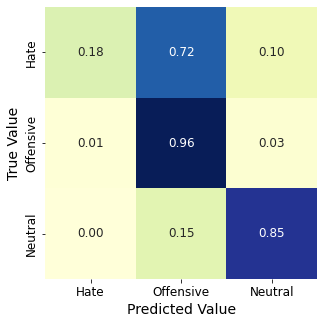

In [26]:
#Confusion Matrix for TFIDF with some features from sentiment analysis
confusionMatrix = confusion_matrix(y_test,y_preds)
matrix_proportions = np.zeros((3,3))
for i in range(0,3):
    matrix_proportions[i,:] = confusionMatrix[i,:]/float(confusionMatrix[i,:].sum())
names=['Hate','Offensive','Neutral']
confusion_df = panda.DataFrame(matrix_proportions, index=names,columns=names)
plt.figure(figsize=(5,5))
seaborn.heatmap(confusion_df,annot=True,annot_kws={"size": 12},cmap='YlGnBu',cbar=False, square=True,fmt='.2f')
plt.ylabel(r'True Value',fontsize=14)
plt.xlabel(r'Predicted Value',fontsize=14)
plt.tick_params(labelsize=12)